In [1]:
import random
import matplotlib.pyplot as plt

# --- Markov transition probabilities ---
PROBABILITIES = {
    "vowel_to_vowel": 13,
    "consonant_to_consonant": 33,
}
PROBABILITIES["vowel_to_consonant"] = 100 - PROBABILITIES["vowel_to_vowel"]
PROBABILITIES["consonant_to_vowel"] = 100 - PROBABILITIES["consonant_to_consonant"]

In [2]:
def get_next_character(current: str) -> str:
    """Decide the next character type (vowel/consonant) based on probabilities."""
    random_number = random.randint(1, 100)
    if current == "vowel":
        return "vowel" if random_number <= PROBABILITIES["vowel_to_vowel"] else "consonant"
    else:
        return "consonant" if random_number <= PROBABILITIES["consonant_to_consonant"] else "vowel"

In [3]:
def run_simulation(report_interval: int = 25, max_iterations: int = 500):
    """Run the simulation and return vowel/consonant percentage history."""
    vowels = consonants = counter = 0
    current_character = "vowel"

    vowel_history = []
    consonant_history = []

    while counter < max_iterations:
        current_character = get_next_character(current_character)

        if current_character == "vowel":
            vowels += 1
        else:
            consonants += 1

        if counter % report_interval == 0:
            total = vowels + consonants
            vowel_pct = (vowels / total) * 100
            consonant_pct = (consonants / total) * 100

            print(f"Step {counter}: Vowels {vowels} ({vowel_pct:.2f}%) | "
                  f"Consonants {consonants} ({consonant_pct:.2f}%)")

            vowel_history.append(vowel_pct)
            consonant_history.append(consonant_pct)

        counter += 1

    print("\nSimulation finished ✅")
    return vowel_history, consonant_history

In [4]:
def plot_trends(vowel_data, consonant_data):
    """Plot vowel and consonant percentage trends."""
    plt.figure(figsize=(10, 6))
    plt.plot(vowel_data, label="Vowels (%)", marker="o")
    plt.plot(consonant_data, label="Consonants (%)", marker="s")
    plt.xlabel("Report Step (index)")
    plt.ylabel("Percentage (%)")
    plt.title("Vowel vs Consonant Percentages Over Time")
    plt.ylim(0, 100)  # Percentages always between 0–100
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
vowel_data, consonant_data = run_simulation()

Step 0: Vowels 0 (0.00%) | Consonants 1 (100.00%)
Step 25: Vowels 11 (42.31%) | Consonants 15 (57.69%)
Step 50: Vowels 21 (41.18%) | Consonants 30 (58.82%)
Step 75: Vowels 33 (43.42%) | Consonants 43 (56.58%)
Step 100: Vowels 43 (42.57%) | Consonants 58 (57.43%)
Step 125: Vowels 55 (43.65%) | Consonants 71 (56.35%)
Step 150: Vowels 67 (44.37%) | Consonants 84 (55.63%)
Step 175: Vowels 77 (43.75%) | Consonants 99 (56.25%)
Step 200: Vowels 87 (43.28%) | Consonants 114 (56.72%)
Step 225: Vowels 98 (43.36%) | Consonants 128 (56.64%)
Step 250: Vowels 107 (42.63%) | Consonants 144 (57.37%)
Step 275: Vowels 118 (42.75%) | Consonants 158 (57.25%)
Step 300: Vowels 129 (42.86%) | Consonants 172 (57.14%)
Step 325: Vowels 142 (43.56%) | Consonants 184 (56.44%)
Step 350: Vowels 152 (43.30%) | Consonants 199 (56.70%)
Step 375: Vowels 163 (43.35%) | Consonants 213 (56.65%)
Step 400: Vowels 175 (43.64%) | Consonants 226 (56.36%)
Step 425: Vowels 186 (43.66%) | Consonants 240 (56.34%)
Step 450: Vowels 

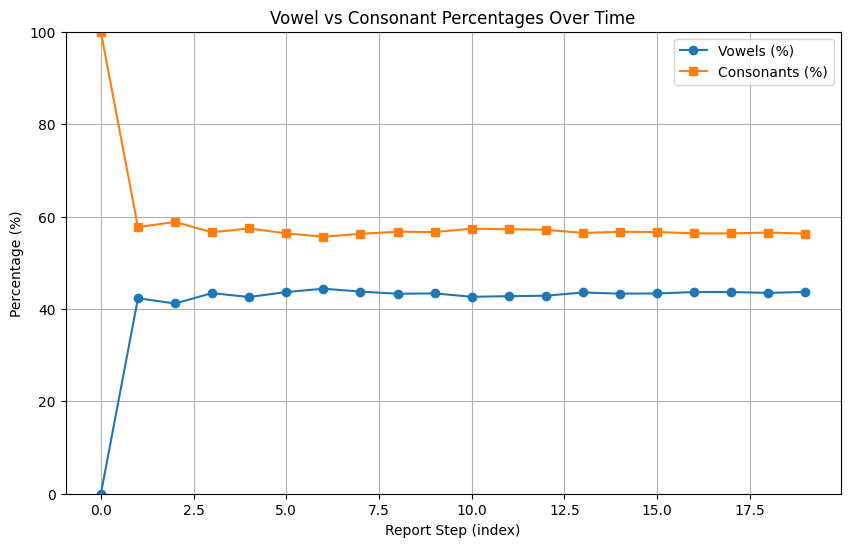

In [6]:
plot_trends(vowel_data, consonant_data)